In [1]:
import numpy as np
# from astropy.cosmology import Planck18 as cosmo
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.25)
from astropy.cosmology import z_at_value
from astropy import units as u
import matplotlib.pyplot as plt

In [4]:
cosmo.Ogamma0

0.0

In [11]:
cosmo.Om0

0.25

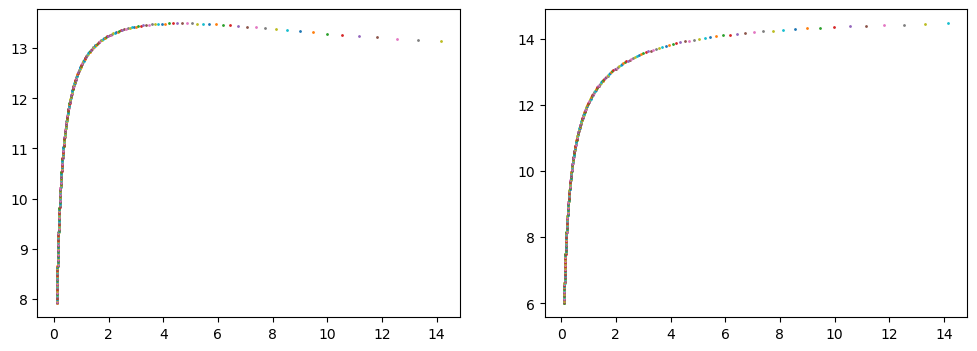

In [13]:
z_steps = np.linspace(z_at_value(cosmo.age, 0.1*u.Gyr).value,0,500)
t_steps = cosmo.age(z_steps).value
t_int = t_steps[1:] - t_steps[:-1]
cosmic_oms = cosmo.Om(z_steps)
cosmic_odes = cosmo.Ode(z_steps)
def d_m_halo_dt(m_halo, step_num):
    '''
    m_halo: mass of halo in solar mass
    t_gyr: cosmic age in Gyr
    return: mass accretion rate of halo in solar mass per Gyr
    '''
    z = z_steps[step_num]
    return m_halo * 0.0336 * (1 + 0.91 * z) * (m_halo / 1e12)**0.06\
        * np.sqrt(cosmic_oms[step_num] * (1 + z)**3 + cosmic_odes[step_num])
    # return m_halo * 0.0336 * (1 + 0.91 * z) * (m_halo / 1e12)**0.06\
    #     * np.sqrt(0.25 * (1 + z)**3 + 0.75)


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axes.flatten()
m_halo_init = 1e6
m_halo = m_halo_init
ax2.scatter(t_steps[0], np.log10(m_halo), s=1)
for it in range(len(t_steps)-1):
    m_halo_acc_rate = d_m_halo_dt(m_halo, it)
    m_halo += m_halo_acc_rate * t_int[it]
    t_gyr = t_steps[it+1]
    ax1.scatter(t_gyr, np.log10(m_halo_acc_rate), s=1)
    ax2.scatter(t_gyr, np.log10(m_halo), s=1)

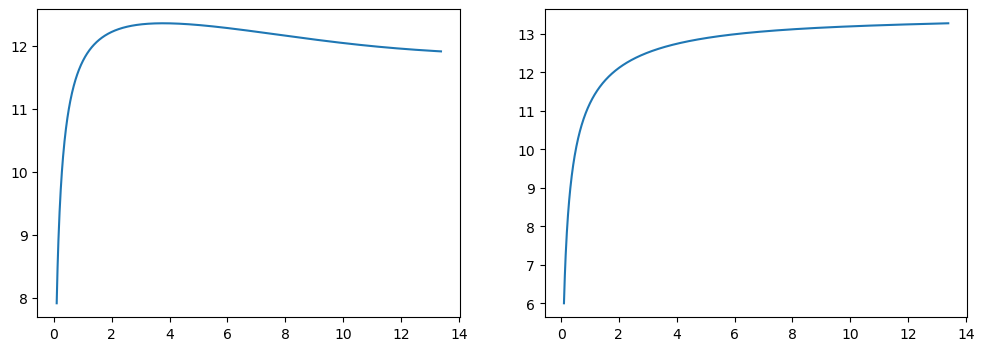

In [23]:
t_steps = np.arange(0.1, 13.4, 0.01) # Gyr
z_steps = z_at_value(cosmo.age, t_steps * u.Gyr).value
cosmic_oms = cosmo.Om(z_steps)
cosmic_odes = cosmo.Ode(z_steps)
def d_m_halo_dt(m_halo, step_num):
    '''
    m_halo: mass of halo in solar mass
    t_gyr: cosmic age in Gyr
    return: mass accretion rate of halo in solar mass per Gyr
    '''
    z = z_steps[step_num]
    return m_halo * 0.0336 * (1 + 0.91 * z) * (m_halo / 1e12)**0.06\
        * np.sqrt(cosmic_oms[step_num] * (1 + z)**3 + cosmic_odes[step_num])
m_halo_init = 1e6 # solar mass
t_step = t_steps[1] - t_steps[0]
m_halo = m_halo_init
m_halos = [m_halo]
m_halo_acc_rates = []
for it in range(len(t_steps)-1):
    m_halo_acc_rate = d_m_halo_dt(m_halo, it)
    m_halo_acc_rates.append(m_halo_acc_rate)
    m_halo += m_halo_acc_rate * t_step
    m_halos.append(m_halo)
    t_gyr = t_steps[it+1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axes.flatten()
ax1.plot(t_steps[:-1], np.log10(m_halo_acc_rates))
ax2.plot(t_steps, np.log10(m_halos))


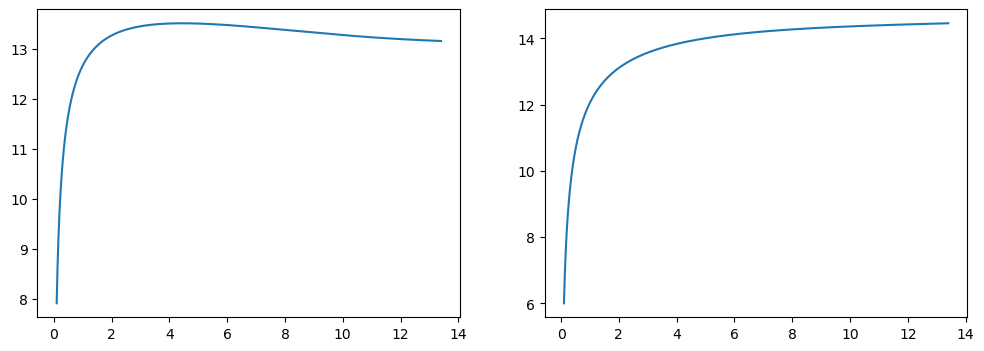

In [27]:
t_steps = np.arange(0.1, 13.4, 0.001) # Gyr
z_steps = z_at_value(cosmo.age, t_steps * u.Gyr).value
cosmic_oms = cosmo.Om(z_steps)
cosmic_odes = cosmo.Ode(z_steps)
def d_m_halo_dt(m_halo, step_num):
    '''
    m_halo: mass of halo in solar mass
    t_gyr: cosmic age in Gyr
    return: mass accretion rate of halo in solar mass per Gyr
    '''
    z = z_steps[step_num]
    return m_halo * 0.0336 * (1 + 0.91 * z) * (m_halo / 1e12)**0.06\
        * np.sqrt(cosmic_oms[step_num] * (1 + z)**3 + cosmic_odes[step_num])
m_halo_init = 1e6 # solar mass
t_step = t_steps[1] - t_steps[0]
m_halo = m_halo_init
m_halos = [m_halo]
m_halo_acc_rates = []
for it in range(len(t_steps)-1):
    m_halo_acc_rate = d_m_halo_dt(m_halo, it)
    m_halo_acc_rates.append(m_halo_acc_rate)
    m_halo += m_halo_acc_rate * t_step
    m_halos.append(m_halo)
    t_gyr = t_steps[it+1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axes.flatten()
ax1.plot(t_steps[:-1], np.log10(m_halo_acc_rates))
ax2.plot(t_steps, np.log10(m_halos))


In [48]:
(u.yr**-1).to(u.Gyr**-1)

999999999.9999999

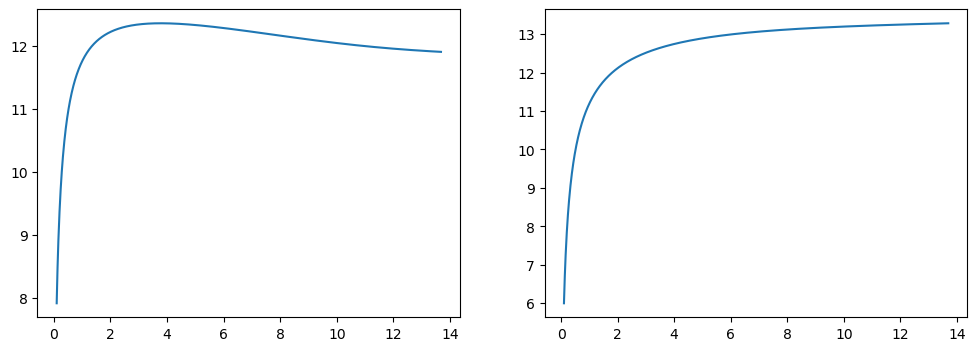

In [49]:
t_steps = np.arange(0.1, 13.7, 0.01) # Gyr
z_steps = z_at_value(cosmo.age, t_steps * u.Gyr).value
cosmic_oms = cosmo.Om(z_steps)
cosmic_odes = cosmo.Ode(z_steps)
def d_m_halo_dt(m_halo, step_num):
    '''
    m_halo: mass of halo in solar mass
    t_gyr: cosmic age in Gyr
    return: mass accretion rate of halo in solar mass per Gyr
    '''
    z = z_steps[step_num]
    # return m_halo * 0.0336 * (1 + 0.91 * z) * (m_halo / 1e12)**0.06\
    #     * np.sqrt(cosmic_oms[step_num] * (1 + z)**3 + cosmic_odes[step_num])
    return 33.6 * 1e9 * (1 + 0.91 * z) * (m_halo / 1e12)**1.06\
        * np.sqrt(cosmic_oms[step_num] * (1 + z)**3 + cosmic_odes[step_num])
m_halo_init = 1e6 # solar mass
t_step = t_steps[1] - t_steps[0]
m_halo = m_halo_init
m_halos = [m_halo]
m_halo_acc_rates = []
for it in range(len(t_steps)-1):
    m_halo_acc_rate = d_m_halo_dt(m_halo, it)
    m_halo_acc_rates.append(m_halo_acc_rate)
    m_halo += m_halo_acc_rate * t_step
    m_halos.append(m_halo)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axes.flatten()
ax1.plot(t_steps[:-1], np.log10(m_halo_acc_rates))
ax2.plot(t_steps, np.log10(m_halos))


In [43]:
m_halo_acc_rates = np.array(m_halo_acc_rates)
m_halo_acc_rates

array([8.13102492e+07, 1.30366251e+08, 2.00290187e+08, ...,
       8.03405376e+11, 8.02956646e+11, 8.02509284e+11])

In [32]:
np.log10(np.array(m_halo_acc_rates).max())

12.901476186235852

(0.0, 14.0)

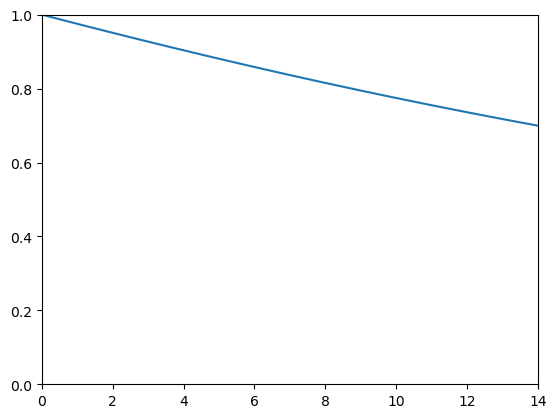

In [40]:
sfe = 0.05
mass_return = 0
tau_eq = 10.0   # Gyr

t_steps = np.arange(0.1, 14, 0.005) # Gyr
def gas_frac(t):

    return 1/(1 + sfe * (1 - mass_return) * (t / (1 - np.exp(-t / tau_eq)) - tau_eq))
plt.plot(t_steps, gas_frac(t_steps))
plt.ylim(0, 1)
plt.xlim(0, 14)

In [ ]:
t_steps = np.arange(0.1, 13.4, 0.001) # Gyr
z_steps = z_at_value(cosmo.age, t_steps * u.Gyr).value
cosmic_oms = cosmo.Om(z_steps)
cosmic_odes = cosmo.Ode(z_steps)
def d_m_halo_dt(m_halo, step_num):
    '''
    m_halo: mass of halo in solar mass
    t_gyr: cosmic age in Gyr
    return: mass accretion rate of halo in solar mass per Gyr
    '''
    z = z_steps[step_num]
    return m_halo * 0.0336 * (1 + 0.91 * z) * (m_halo / 1e12)**0.06\
        * np.sqrt(cosmic_oms[step_num] * (1 + z)**3 + cosmic_odes[step_num])
m_halo_init = 1e6 # solar mass
t_step = t_steps[1] - t_steps[0]
m_halo = m_halo_init
m_halos = [m_halo]
m_halo_acc_rates = []
for it in range(len(t_steps)-1):
    m_halo_acc_rate = d_m_halo_dt(m_halo, it)
    m_halo_acc_rates.append(m_halo_acc_rate)
    m_halo += m_halo_acc_rate * t_step
    m_halos.append(m_halo)
    t_gyr = t_steps[it+1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axes.flatten()
ax1.plot(t_steps[:-1], np.log10(m_halo_acc_rates))
ax2.plot(t_steps, np.log10(m_halos))


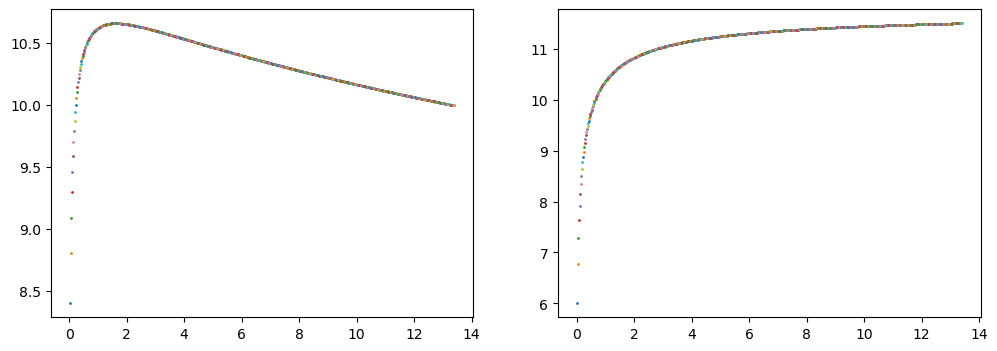

In [3]:
t_steps = np.arange(0.01, 13.4, 0.02) # Gyr
t_mids = (t_steps[1:] + t_steps[:-1]) / 2
# z_steps = z_at_value(cosmo.age, t_steps * u.Gyr).value
z_mids = z_at_value(cosmo.age, t_mids * u.Gyr).value
def d_m_halo_dt_lilly(m_halo, step_num):
    '''
    m_halo: mass of halo in solar mass
    t_gyr: cosmic age in Gyr
    return: mass accretion rate of halo in solar mass per Gyr
    '''
    z = z_mids[step_num]
    return m_halo * 0.027 * (m_halo/1e12)**0.15 * (1 + z + 0.1*(1+z)**(-1.25))**2.5
# cosmic_oms = cosmo.Om(z_steps)
# cosmic_ogs = cosmo.Ogamma(z_steps)
m_halo_init = 1e6 # solar mass
t_step = t_steps[1] - t_steps[0]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axes.flatten()
m_halo = m_halo_init
ax2.scatter(t_steps[0], np.log10(m_halo), s=1)
for it in range(len(t_mids)):
   
    # m_halo_acc_rate = d_m_halo_dt(m_halo, it+1)
    m_halo_acc_rate = d_m_halo_dt_lilly(m_halo, it)
    m_halo += m_halo_acc_rate * t_step
    t_gyr = t_steps[it+1]
    ax1.scatter(t_gyr, np.log10(m_halo_acc_rate), s=1)
    ax2.scatter(t_gyr, np.log10(m_halo), s=1)

In [8]:
np.arange(z_at_value(cosmo.age, 0.1*u.Gyr).value, 0, -0.1)

(298,)